## Часть 1. Приоритизация гипотез.

### Импорт бибилотек и проверка файлов.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

In [2]:
#прочтём файл
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
#ознакомимися с информацией датафрайма
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
#выведим строки файла для ознакомления с содержанием
hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


с данными почти всё в порядке, отсутствуют дубликаты/пропуски.  
единственное- надо привести нахвания столбцов к нижнему регистру.

In [5]:
hypothesis.columns = map(str.lower, hypothesis.columns)

In [6]:
hypothesis.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


красота!

### Фреймворк ICE для приоритизации гипотез.

In [7]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis_ICE = hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(2)
hypothesis_ICE

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.20
0,"Добавить два новых канала привлечения трафика,...",13.33
7,Добавить форму подписки на все основные страни...,11.20
6,Показать на главной странице баннеры с актуаль...,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,7.00
1,"Запустить собственную службу доставки, что сок...",2.00
5,"Добавить страницу отзывов клиентов о магазине,...",1.33
3,"Изменить структура категорий, что увеличит кон...",1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",1.00


### Фреймворк RICE для приоритизации гипотез.

In [8]:
hypothesis['RICE'] = hypothesis['impact'] * hypothesis['reach'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis_RICE = hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False).round(2)
hypothesis_RICE

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


### Как изменилась приоритизация гипотез при применении RICE вместо ICE.

In [9]:
hypothesis.sort_values(by='ICE', ascending=False).round(2)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.2
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.0
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33,4.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00,3.0


В обеих таблицах очевидно, что тройка лидеров меняется.  
В методе ICE на первые три места выходят гипотезы с индексами 8, 0 и 7, в то время как в методе RICE эти места занимают гипотезы с индексами 7.  
В гипотезах 7 и 2 этот параметр очень высок (для 7 - 10, что является максимальным значением, для 2 - 8, что также является высоким), в то время как в гипотезе-лидере метода ICE (гипотезе 8) он минимален (равен 1).  
  
  
  
С учетом этого, для тестирования стоит предложить гипотезу №7.

## Часть 2. Анализ A/B-теста

Исзодные данные.  

Тaблица orders  
transactionId — идентификатор заказа;  
visitorId — идентификатор пользователя, совершившего заказ;  
date — дата, когда был совершён заказ;  
revenue — выручка заказа;  
group — группа A/B-теста, в которую попал заказ.  


Таблица visitors
date — дата;  
group — группа A/B-теста;  
visitors — количество пользователей в указанную дату в указанной группе A/B-теста


### Гафик кумулятивной выручки по группам

#### Подготовка данных

In [10]:
# загрузим датафреймы и ознакоамимся с их содержанием
orders = pd.read_csv('/datasets/orders.csv')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [12]:
# переименуем столбцы, переведем столбец с датой в тип даты и проверим на наличие дубликатов.
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
print('кол-во дубликатов:',orders.duplicated().sum())

кол-во дубликатов: 0


In [13]:
#проделаем то же с visitors
visitors = pd.read_csv('/datasets/visitors.csv') #читаем файл
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [15]:
# переведем столбец с датой в тип даты и проверим на наличие дубликатов.
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
print('кол-во дубликатов:',visitors.duplicated().sum())

кол-во дубликатов: 0


In [16]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


### Тест

In [17]:
#cоздадим датафрейм datesGroups с уникальными парами значений 'date' и 'group' из таблицы orders.  
#также избавимся от дубликатов.
datesGroups = orders [['date', 'group']].drop_duplicates()

In [18]:
# создадим переменную ordersAggregated, в которую будет входить дата, группа теста, число уникальных заказов в группе теста,
# число уникальных пользователей, которые совершили хотя бы 1 заказ в группе

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], \
orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique',
                                     'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

In [19]:
# создадим переменную visitorsAggregated, в которую входит: дата, группу теста,
# количество уникальных посетителей в группе теста.

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],\
                                                                         visitors['group'] == x['group'])]\
                                       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
.sort_values(by=['date','group']) 

In [20]:
# отсортируем переменные по столбцам 'date', 'group' и присвоим им перменную cumulativeData

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

In [21]:
# присвоим столбцам cumulativeData названия ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [22]:
# ощнакомимся с первыми 5 строками новой переменной
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Создадим переменные cumulativeRevenueA и cumulativeRevenueB, в них сохраним данные о дате, выручке и числе заказов в группах A и B. Построим графики кумулятивной выручки по дням по группам.

#### График кумулятивной выручки по группам

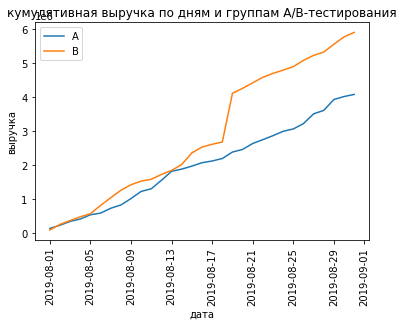

In [23]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('дата')
plt.ylabel('выручка')
plt.title("кумулятивная выручка по дням и группам A/B-тестирования")
plt.legend() 
plt.xticks(rotation=90)
plt.show()

В первой половине месяца заметно, что группа "B" имеет небольшое преимущество в росте выручки по сравнению с группой "A". На 13 августа обе группы имеют примерно равную выручку. Во второй половине месяца группа "B" становится явным лидером, её выручка значительно превышает выручку группы "A". Однако стоит отметить резкий всплеск выручки в группе "B" 19 августа, что вероятнее всего связано с крупными заказами. По графикам можно предположить, что без этого всплеска выручки в обеих группах росли приблизительно одинаково, либо в этот день было осуществлено очень много заказов.

In [24]:
print('медианное значение одного заказа 19 августа =',orders.query(' date == "2019-08-19" ')['revenue'].median())
orders.query(' date == "2019-08-19" ').sort_values(by='revenue', ascending=False).head(8)

медианное значение одного заказа 19 августа = 2630.0


,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
530,3970235543,2912540959,2019-08-19,43990,A
527,1570513684,2837914161,2019-08-19,33405,B
421,3765974140,1357170471,2019-08-19,31680,A
461,2683113224,154576532,2019-08-19,26550,B
525,3031564664,393266494,2019-08-19,21550,A
368,3268879337,2536252163,2019-08-19,20026,B
366,2037051350,1957949546,2019-08-19,16770,A


видим, что да, был такой заказ №425 на аномально большую сумму.

#### График кумулятивного среднего чека по группам

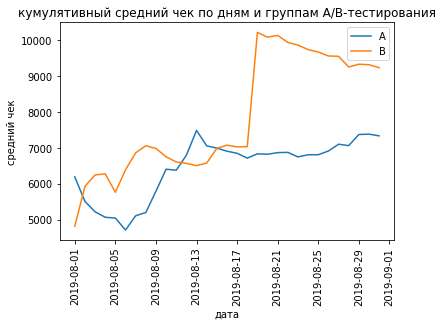

In [25]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('дата')
plt.ylabel('средний чек')
plt.title("кумулятивный средний чек по дням и группам A/B-тестирования")
plt.legend() 
plt.xticks(rotation=90)
plt.show()

Как и в предыдущем графике, в то же время кумулятивный средний чек в сегменте В значительно возрос.  
Однако, затем он постепенно постепенно снижается.  

#### График относительного изменения кумулятивного среднего чека группы B к группе A

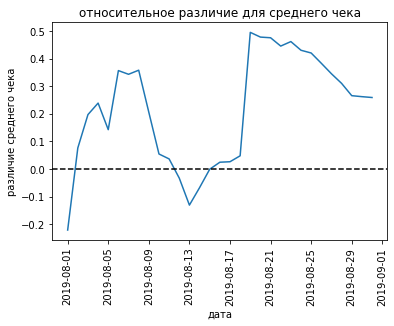

In [26]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel('дата')
plt.ylabel('различие среднего чека')
plt.title("относительное различие для среднего чека")
plt.xticks(rotation=90)
plt.show()

На нескольких точках график, отображающий разницу между сегментами, резко меняет свое значение, что, вероятно, связано с аномалиями с заказами.  
Но в целом график расположен выше нуля.

#### График кумулятивного среднего количества заказов на посетителя по группам (конверсии).

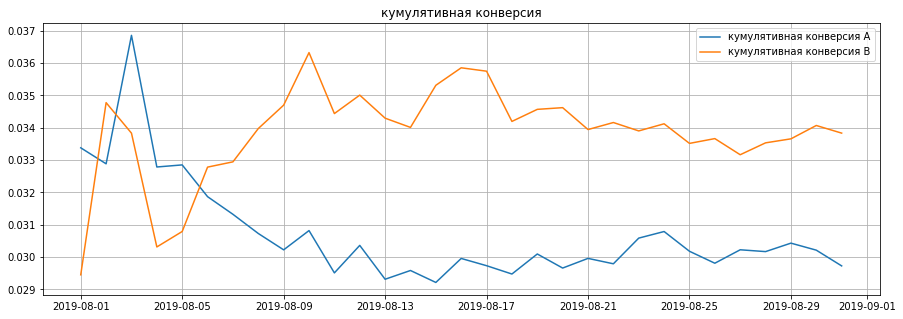

In [27]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='кумулятивная конверсия A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='кумулятивная конверсия B')
plt.title('кумулятивная конверсия')
plt.legend();


С начала месяца и до 5 августа конверсия группы "A" была значительно выше, причем 3 августа она достигла максимального значения за весь период исследования, за исключением 2 августа.  
Однако после достижения пика конверсия стала резко падать и с 9 августа продолжала находиться на минимальном уровне, колеблясь в диапазоне от 0,029 до 0,031.  
Конверсия группы "B" начала расти с 4 августа и уже к 6 августа превысила конверсию группы "A", продолжая расти до 10 августа, когда достигла пика чуть выше 0,036.  
Затем началось постепенное снижение конверсии, но с 15 по 17 августа произошел всплеск роста, и конверсия достигла чуть менее 0,036.  

В итоге можно сделать вывод, что в целом конверсия группы "B" значительно выше конверсии группы "A" (начиная с 6 августа конверсия "B" стабильно выше "A").

#### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

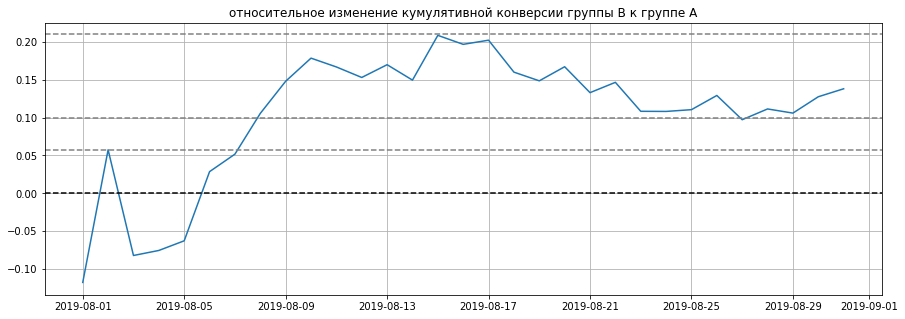

In [28]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], \
                                                    left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.title('относительное изменение кумулятивной конверсии группы B к группе A')

plt.axhline(y=0, color='black', linestyle='--') 
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axhline(y=0.21, color='grey', linestyle='--')
plt.axhline(y=0.057, color='grey', linestyle='--');

С 1 по 5 августа конверсия в группе "A" была выше на 5-10% по сравнению с группой "B", за исключением 2 августа, когда в группе "B" произошел резкий рост конверсии, и результат этой группы на конец дня превысил результат группы "A" на 5%.  
Стоит отметить, что 2 августа произошел значительный рост конверсии в обеих группах, что может свидетельствовать о проведении маркетинговой акции или предложении скидок и т.д., как это было отражено в пункте 3.4.  
Начиная с 6 августа и до конца периода наблюдения группа "B" стала лидировать, ее конверсия продолжала расти до 15 августа, достигнув максимального отрыва от группы "A" на 21%, затем пошло постепенное снижение относительной конверсии до уровня 10%/14%.

#### Точечный график количества заказов по пользователям. 

      visitor_id  transaction_id
1023  4256040402              11
591   2458001652              11
569   2378935119               9
487   2038680547               8
44     199603092               5
744   3062433592               5
55     237748145               5
917   3803269165               5
299   1230306981               5
897   3717692402               5


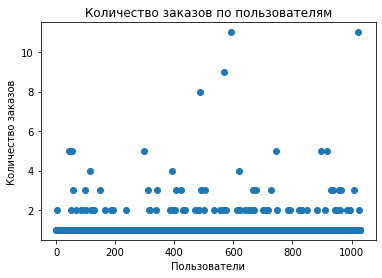

In [29]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['visitor_id', 'transaction_id']

print(ordersByUsers.sort_values(by='transaction_id', ascending=False).head(10))

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['transaction_id']) 
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.title("Количество заказов по пользователям")
plt.show()

Пользователи, которые совершают более 2 заказов, представлены нечасто.

#### 95-й и 99-й перцентили количества заказов на пользователя

In [30]:
print(ordersByUsers.sort_values(by='transaction_id', ascending=False).head(10))

print(np.percentile(ordersByUsers['transaction_id'], [ 95, 99]))

      visitor_id  transaction_id
1023  4256040402              11
591   2458001652              11
569   2378935119               9
487   2038680547               8
44     199603092               5
744   3062433592               5
55     237748145               5
917   3803269165               5
299   1230306981               5
897   3717692402               5
[2. 4.]


Менее 5% пользователей делали более 2 заказов.

####  Точечный график стоимостей заказов.

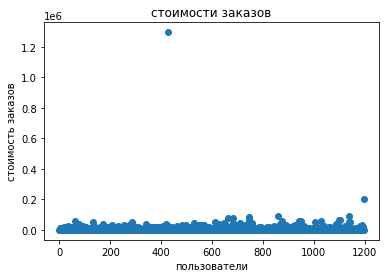

In [31]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.xlabel('пользователи')
plt.ylabel('стоимость заказов')
plt.title("стоимости заказов")
plt.show()

В данных имеются два выброса: один в районе 1 250 000 и другой - в районе 200 000.   
Эти значения выглядят весьма аномальными.

#### 95-й и 99-й перцентили стоимости заказов.

In [32]:
print(orders.head(10))
print(np.percentile(orders['revenue'] , [95, 99]))

   transaction_id  visitor_id       date  revenue group
0      3667963787  3312258926 2019-08-15     1650     B
1      2804400009  3642806036 2019-08-15      730     B
2      2961555356  4069496402 2019-08-15      400     A
3      3797467345  1196621759 2019-08-15     9759     B
4      2282983706  2322279887 2019-08-15     2308     B
5       182168103   935554773 2019-08-15     2210     B
6       398296753  2900797465 2019-08-15     1860     B
7      2626614568    78758296 2019-08-15     1044     A
8      1576988021   295230930 2019-08-15    13710     A
9      1506739906  1882260405 2019-08-15     1855     B
[28000.  58233.2]


Менее 5% пользователей совершали покупки на сумму выше 28 000.  
Только 1% пользователей сделали заказы, превышающие 58 233.

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Сформируем две переменные - ordersByUsersA и ordersByUsersB, каждая из которых будет содержать столбцы ['visitor_id', 'transaction_id'].  
В них мы укажем количество заказов для каждого пользователя, который хотя бы один раз осуществил заказ.

In [33]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

Создадим переменные sampleA и sampleB, в которых для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов, а для пользователей, которые ничего не заказали, будет указано 0.  
Затем, проведем анализ статистической значимости различий в среднем количестве заказов между двумя группами за две недели тестирования.

Формулировка гипотезы:  
Нулевая гипотеза: статистически значимых различий в конверсии между группами нет.  
Альтернативная гипотеза: статистически значимые различия есть.

In [34]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'transaction_id']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'transaction_id'] 
sampleA = pd.concat([ordersByUsersA['transaction_id'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['transaction_id'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['transaction_id'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['transaction_id'])), name='orders')],axis=0)
print('p-value:',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('относительные различия:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.017
относительные различия: 0.138


Так как P-value значительно меньше 0.05, поэтому мы можем отвергнуть нулевую гипотезу.  
Анализ "сырых данных" показал, что существует статистически значимая разница в среднем количестве заказов между группами.  
Относительный прирост конверсии группы В по сравнению с группой А составляет 13,8%.

#### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Нулевая гипотеза: статистически значимых различий в средних чеках между группами нет  
Альтернативная гипотеза: статистически значимые различия есть

In [35]:
#проведем сравнение "средних чеков" на основе "сырых данных", после чего повторим ту же процедуру, используя выборку без выбросов.
print('p-value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('относительные различия:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value: 0.729
относительные различия: 0.259


Так как P-value значительно превышает 0.05, мы не можем отвергать нулевую гипотезу.  
Относительное различие между чеками составляет около 26%.

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Подготовка "очищенных" данных.  

95-й и 99-й перцентили для среднего чека составляют 28 000 и 58 233 рубля соответственно, а 95-й и 99-й перцентили для числа заказов на одного пользователя равны 2 и 4 заказам на пользователя.  
Определим аномальных пользователей, которые делают 4 заказа и более, либо совершают заказ на сумму свыше 30 000 рублей.  
Это позволит нам убрать 1% пользователей с наибольшим числом заказов и от 1% до 5% заказов с наибольшей стоимостью. 
Важно отметить, что мы будем убирать именно пользователей.  


In [36]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transaction_id'] > 4]['visitor_id'],
        ordersByUsersB[ordersByUsersB['transaction_id'] > 4]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

Сначала мы выявим аномальные заказы, а затем удалим пользователей, совершивших эти заказы, и добавим их в список аномальных.  
Также создадим срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, которые оформляли заказы на сумму свыше 10 000 рублей — usersWithExpensiveOrders.  
Затем объединим их в таблице abnormalUsers, удалим дубликаты и отсортируем их по возрастанию.

Нулевая гипотеза: статистически значимых различий в конверсии между группами нет.  
Альтернативная гипотеза: статистически значимые различия есть.

In [37]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transaction_id'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transaction_id'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
print('p-value:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('относительные различия:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value: 0.019
относительные различия: 0.144


Как и в случае с "сырыми" данными, мы получили статистически значимые результаты, которые показывают, что группа В больше группы А.

#### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Нулевая гипотеза: статистически значимых различий в средних чеках между группами нет  
Альтернативная: статистически значимые различия есть.

In [38]:
print('P-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительные различия:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

P-value: 0.979
Относительные различия: -0.017


Отвергать нулевую гипотезу мы не можем, так как значение P-value значительно больше 0.05, как и в случае со "Сырыми" данными.  
Однако средний чек группы B оказался незначительно ниже(на 2%), чем средний чек группы A, в то время как по "Сырым" данным он был выше на 26%.

## Вывод.

Между группами существует статистически значимое различие по конверсии, как по "сырым" данным, так и после удаления выбросов.  
С другой стороны, нет статистически значимого различия по среднему чеку между группами ни по "сырым" данным, ни после фильтрации аномалий.  
График различия конверсии между группами указывает на то, что результаты группы B лучше группы A, так как они имеют тенденцию к росту или зафиксировались около среднего значения.  
С другой стороны, график различия среднего чека является непостоянным и именно он позволил выявить выбросы.  
Из этого графика нельзя сделать определенных выводов.  

Считаю, что слеюует рассмотреть вариант остановки теста и признания победы группы B.